# **Use case: CAR MILEAGE PREDICTION**

**This use case is intended to develop a model to predict the mileage of a car in the city.** 

- Data Ingestion
- Health Check : Missing Values,Skewness,Kurtosis
- Data Exploration : Multivariate Analysis
- Split the Data
- Linear Regression using SK-Learn
- Predict and Evaluate
- Checking Assumption and Model Diagnostics with Stats Model Library
- Predict and Evaluate
- Modular Improvement : Using Subset Selection
- Final Comments and Road Map 

## Data Ingestion

In [1]:
import pandas as pd
data = pd.read_csv("cars.csv")

In [2]:
data.head(8)

,Manuf,Model,Type,Origin,DriveTrain,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,MSRP
0,Acura,NSX coupe 2dr manual S,Sports,Asia,Rear,3.2,6.0,290,17,24,3153,100,174,89765
1,Acura,3.5 RL w/Navigation 4dr,Sedan,Asia,Front,3.5,6.0,225,18,24,3893,115,197,46100
2,Acura,3.5 RL 4dr,Sedan,Asia,Front,3.5,6.0,225,18,24,3880,115,197,43755
3,Acura,MDX,SUV,Asia,All,3.5,6.0,265,17,23,4451,106,189,36945
4,Acura,TL 4dr,Sedan,Asia,Front,3.2,6.0,270,20,28,3575,108,186,33195
5,Acura,TSX 4dr,Sedan,Asia,Front,2.4,4.0,200,22,29,3230,105,183,26990
6,Acura,RSX Type S 2dr,Sedan,Asia,Front,2.0,4.0,200,24,31,2778,101,172,23820
7,Audi,RS 6 4dr,Sports,Europe,Front,4.2,8.0,450,15,22,4024,109,191,84600


## Data Understanding

- **This use case is intended to develop a model to predict the mileage of a car in the city. Hence the following variables are dropped from the dataset**
- Manuf : Not a feature variable unless we create a seperate category binning a few manufacturers in specific
groups
- Model : not a feature variable
- Mpg_Highway : A target variable
- MSRP : A target variable


In [3]:
data["Manuf"].value_counts()

Toyot    28
Chevr    27
Merce    26
Ford     23
BMW      20
Audi     19
Honda    17
Nissa    17
Volks    15
Chrys    15
Dodge    13
Mitsu    13
Volvo    12
Jagua    12
Hyund    12
Subar    11
Ponti    11
Mazda    11
Lexus    11
Kia      11
Buick     9
Mercu     9
Linco     9
Satur     8
Cadil     8
Suzuk     8
Infin     8
GMC       8
Acura     7
Porsc     7
Saab      7
Land      3
Oldsm     3
Jeep      3
Scion     2
Isuzu     2
MINI      2
Humme     1
Name: Manuf, dtype: int64

In [4]:
data.columns

Index(['Manuf', 'Model', 'Type', 'Origin', 'DriveTrain', 'EngineSize',
       'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight',
       'Wheelbase', 'Length', 'MSRP'],
      dtype='object')

In [5]:
drop_columns = ['Manuf', 'Model','MPG_Highway','MSRP']

In [6]:
data_cars = data.drop(drop_columns,axis = 1)

In [7]:
data_cars.head()

,Type,Origin,DriveTrain,EngineSize,Cylinders,Horsepower,MPG_City,Weight,Wheelbase,Length
0,Sports,Asia,Rear,3.2,6.0,290,17,3153,100,174
1,Sedan,Asia,Front,3.5,6.0,225,18,3893,115,197
2,Sedan,Asia,Front,3.5,6.0,225,18,3880,115,197
3,SUV,Asia,All,3.5,6.0,265,17,4451,106,189
4,Sedan,Asia,Front,3.2,6.0,270,20,3575,108,186


### Missing values

In [8]:
data_cars.isnull().sum()

Type          0
Origin        0
DriveTrain    0
EngineSize    0
Cylinders     2
Horsepower    0
MPG_City      0
Weight        0
Wheelbase     0
Length        0
dtype: int64

In [9]:
data_cars.shape

(428, 10)

In [10]:
# only 2 missing rows out of 428 rows , hence drop
data_nomiss = data_cars.dropna()
data_nomiss.isnull().sum()

Type          0
Origin        0
DriveTrain    0
EngineSize    0
Cylinders     0
Horsepower    0
MPG_City      0
Weight        0
Wheelbase     0
Length        0
dtype: int64

## Creating a subset with all the numeric variables

In [11]:
data_nomiss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 0 to 427
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Type        426 non-null    object 
 1   Origin      426 non-null    object 
 2   DriveTrain  426 non-null    object 
 3   EngineSize  426 non-null    float64
 4   Cylinders   426 non-null    float64
 5   Horsepower  426 non-null    int64  
 6   MPG_City    426 non-null    int64  
 7   Weight      426 non-null    int64  
 8   Wheelbase   426 non-null    int64  
 9   Length      426 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 36.6+ KB


In [12]:
data_num = pd.DataFrame()
data_cat = pd.DataFrame()

for i in data_nomiss.columns:
  if data_nomiss[i].dtype == "object":
    data_cat[i] = data_nomiss[i] 
  else:
    data_num[i] = data_nomiss[i]
  

In [13]:
data_num.head(8)

,EngineSize,Cylinders,Horsepower,MPG_City,Weight,Wheelbase,Length
0,3.2,6.0,290,17,3153,100,174
1,3.5,6.0,225,18,3893,115,197
2,3.5,6.0,225,18,3880,115,197
3,3.5,6.0,265,17,4451,106,189
4,3.2,6.0,270,20,3575,108,186
5,2.4,4.0,200,22,3230,105,183
6,2.0,4.0,200,24,2778,101,172
7,4.2,8.0,450,15,4024,109,191


# Multivariate Data Exploration: Pairplot and Heatmap

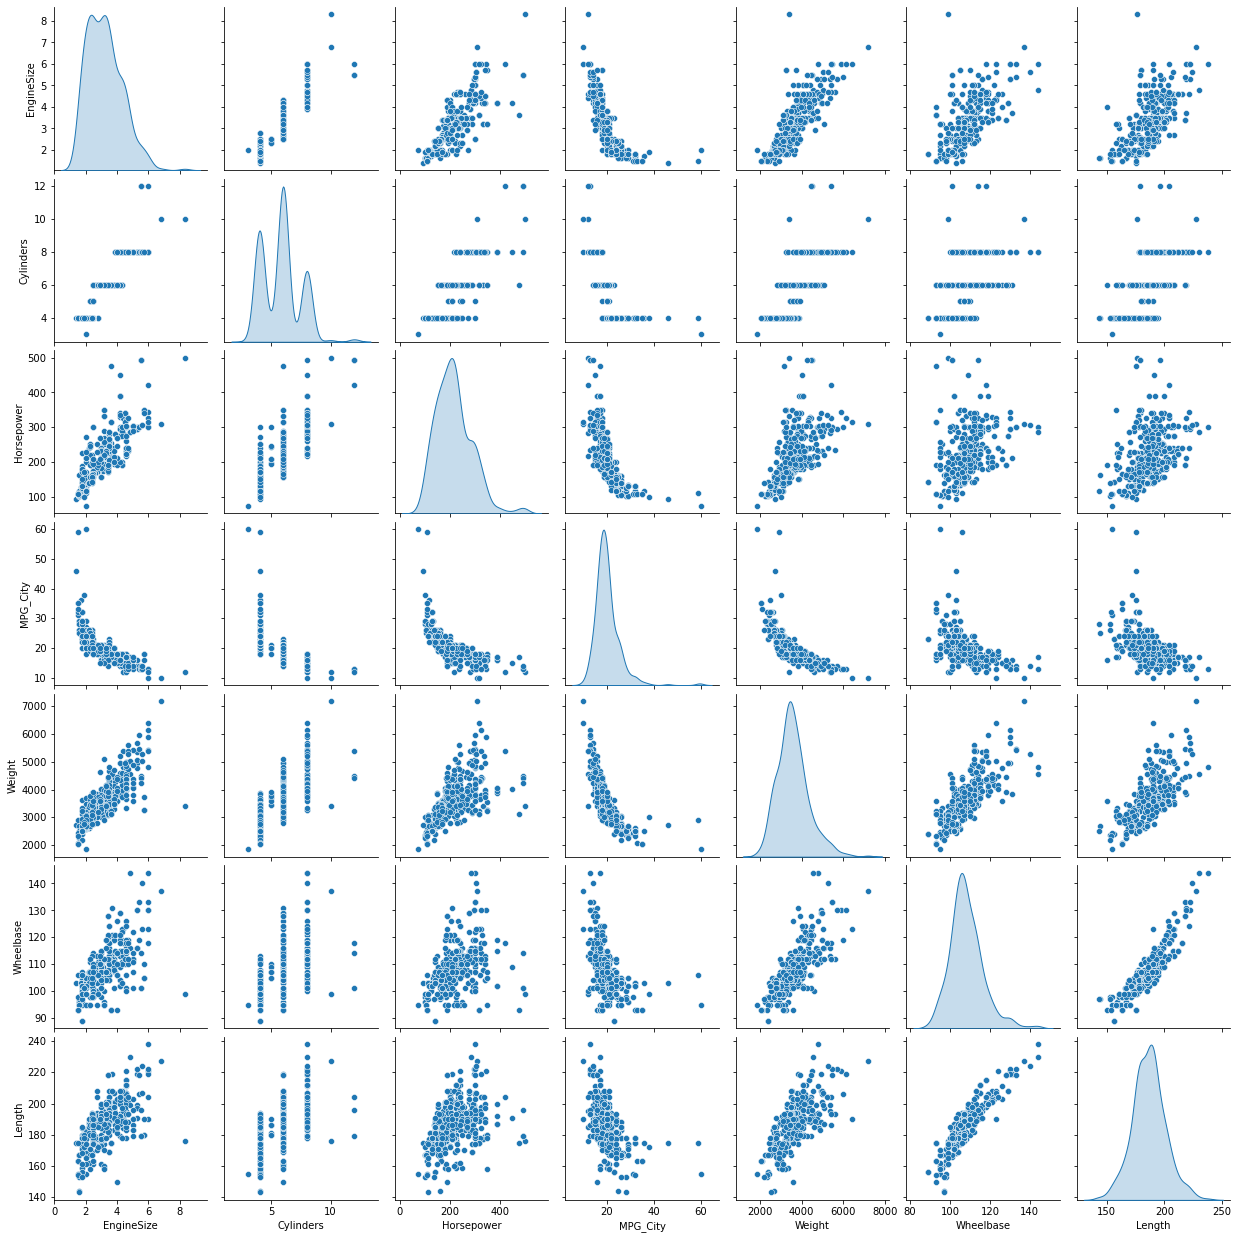

In [14]:
import seaborn as sns
sns.pairplot(data_num,diag_kind = "kde")

In [15]:
# Check Multicollinearity
data_num.corr(method = "pearson")

,EngineSize,Cylinders,Horsepower,MPG_City,Weight,Wheelbase,Length
EngineSize,1.000000,0.908002,0.793250,-0.717860,0.808707,0.638947,0.636015
Cylinders,0.908002,1.000000,0.810341,-0.684402,0.742209,0.546730,0.547783
Horsepower,0.793250,0.810341,1.000000,-0.677034,0.631758,0.387561,0.382386
MPG_City,-0.717860,-0.684402,-0.677034,1.000000,-0.740418,-0.508029,-0.504184
Weight,0.808707,0.742209,0.631758,-0.740418,1.000000,0.760857,0.689168
Wheelbase,0.638947,0.546730,0.387561,-0.508029,0.760857,1.000000,0.889838
Length,0.636015,0.547783,0.382386,-0.504184,0.689168,0.889838,1.000000


<AxesSubplot:>

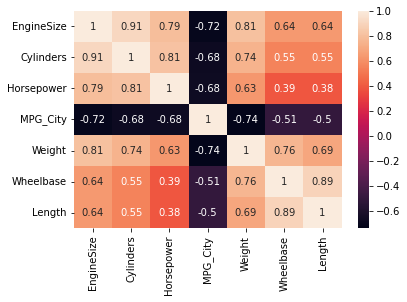

In [16]:
sns.heatmap(data_num.corr(method = "pearson") , annot = True)

## Split the data into feature and target

In [17]:
cars_features = data_num.drop("MPG_City",axis = 1)
cars_target = data_num["MPG_City"]

## Split the data into Train and Test

In [18]:
from sklearn.model_selection import train_test_split

features_train,features_test,target_train,target_test=train_test_split(cars_features,cars_target,test_size=0.3,random_state=5)

In [19]:
features_train.shape

(298, 6)

In [20]:
features_test.shape

(128, 6)

# **First Regression model with all the numeric variables using sklearn library**

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model=LinearRegression()

In [23]:
model.fit(features_train,target_train)

LinearRegression()

# Finding R Square of the Model

In [24]:
model.score(features_train,target_train )

0.6074360589641193

- R-Square is approx 61% that means around 39% propotion in Variance of Dependent Variable is still unexplained which is a sign of underfitting.

# Prediction

In [25]:
target_pred = model.predict(features_test)

In [26]:
print(f"{target_test[:5]}  {target_pred[:5]}")

139    27
353    32
368    24
195    17
53     20
Name: MPG_City, dtype: int64  [27.30025429 28.1587493  24.22428802 14.84192897 20.19930213]


# Evaluation :Mean Absolute Error, Mean squared Error,Root mean squared error

In [27]:
from sklearn import metrics
import numpy as np
print(f"The MAE is : {metrics.mean_absolute_error(target_test,target_pred)}")
print(f"The MSE is : {metrics.mean_squared_error(target_test,target_pred)}")
print(f"The RMSE is : {np.sqrt(metrics.mean_squared_error(target_test,target_pred))}")

The MAE is : 1.6384978683238633
The MSE is : 4.429807298233788
The RMSE is : 2.1047107398010274


- The benchmark model seems to perform well as the error metrics are quite low, however we need to check that whether the model assumptions are being fulfilled or not

- For that, we will use statsmodel library

# **First Regression model with all the numeric variables using statsmodel library**

In [28]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

## Default statsmodel Regression :without Intercept

In [29]:
model_sm = sm.OLS(target_train,features_train).fit()
target_pred = model_sm.predict(features_test)

print(f"The MAE is : {metrics.mean_absolute_error(target_test,target_pred)}")
print(f"The MSE is : {metrics.mean_squared_error(target_test,target_pred)}")
print(f"The RMSE is : {np.sqrt(metrics.mean_squared_error(target_test,target_pred))}")

The MAE is : 1.9470442552631049
The MSE is : 7.087311312704072
The RMSE is : 2.66220046440986


**Here we can observe that MAE ,MSE ,RMSE are quit higher than SK-Learn Model this is because Stats Model does not use intercept in the Model by default so the Model accuracy is bit on the lower side.**

# Model Summary

In [30]:
model_sm_summary = model_sm.summary()

In [31]:
model_sm_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               MPG_City   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              1158.
Date:                Mon, 14 Feb 2022   Prob (F-statistic):                   2.65e-200
Time:                        16:26:35   Log-Likelihood:                         -850.37
No. Observations:                 298   AIC:                                      1713.
Df Residuals:                     292   BIC:                                      1735.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
EngineSize    -2.6898      0.569     -4.724      0.000      -3.811      -1.569
Cylinders      0.7238      0.397      1.825      0.069      -0.057       1.504
Horsepower    -0.0093      0.006     -1.496      0.136      -0.022       0.003
Weight        -0.0054      0.001     -8.864      0.000      -0.007      -0.004
Wheelbase      0.3520      0.067      5.269      0.000       0.221       0.483
Length         0.0424      0.037      1.142      0.254      -0.031       0.116
==============================================================================
Omnibus:                      274.103   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8668.383
Skew:                           3.632   Prob(JB):                         0.00
Kurtosis:                      28.404   Cond. No.                     9.44e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Statsmodel Regression : With Intercept

In [32]:
# Adding intercept
features_train_intercept = sm.add_constant(features_train)
features_test_intercept = sm.add_constant(features_test)

C:\Users\winpc\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [33]:
# Creating the model with intercept included data

model_sm = sm.OLS(target_train,features_train_intercept).fit()
target_pred = model_sm.predict(features_test_intercept)

print(f"The MAE is : {metrics.mean_absolute_error(target_test,target_pred)}")
print(f"The MSE is : {metrics.mean_squared_error(target_test,target_pred)}")
print(f"The RMSE is : {np.sqrt(metrics.mean_squared_error(target_test,target_pred))}")

The MAE is : 1.6384978683238183
The MSE is : 4.42980729823324
The RMSE is : 2.1047107398008973


In [34]:
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MPG_City   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     75.05
Date:                Mon, 14 Feb 2022   Prob (F-statistic):           3.30e-56
Time:                        16:26:35   Log-Likelihood:                -802.54
No. Observations:                 298   AIC:                             1619.
Df Residuals:                     291   BIC:                             1645.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.8212      3.508     10.496      0.000      29.917      43.726
EngineSize    -0.5929      0.525     -1.129      0.260      -1.627       0.441
Cylinders      0.1093      0.343      0.318      0.751      -0.567       0.785
Horsepower    -0.0220      0.005     -4.031      0.000      -0.033      -0.011
Weight        -0.0039      0.001     -7.126      0.000      -0.005      -0.003
Wheelbase      0.1417      0.060      2.346      0.020       0.023       0.261
Length        -0.0645      0.033     -1.939      0.053      -0.130       0.001
==============================================================================
Omnibus:                      346.128   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20111.258
Skew:                           5.059   Prob(JB):                         0.00
Kurtosis:                      41.953   Cond. No.                     6.21e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Checking the Assumptions of the Model

- **Multicollinearity**: Present

    **Reason**: 
    
    See the **Warnings[2]** --> The condition number is large, 6.21e+04. This might indicate that there are strong multicollinearity or other numerical problems. **High the Cond. No. high is the Multicollinearity.** **If no such warning is present then there is no multicolinearity**.


- **Normality of the Residuals**: Not Normally distributed

    **Reason**:  
            Here **Prob(JB) = 0.00** but it should be > 0.05 
            Here **Skew = 5.059** which is very high 
            Here **Kurtosis = 41.953** which is very high  
            
            **Due to multicollinearity the Cylinders and wheelbase have changed from -ve corr to +ve corr. which is not good.**
 
 - **Auto Correlation in the Residuals or (I.I.D)**: Auto Correlation in the Residuals is not present and I.I.D is maintained

    **Reason**:  
            Here **Durbin-Watson =	2.002** and it should be around to 2 

            



# Model Improvement 

In [35]:
#groupby statistics : mileage by type
data_nomiss.groupby("Type")["MPG_City"].mean()

Type
Hybrid    55.000000
SUV       16.100000
Sedan     21.083969
Sports    18.425532
Truck     16.500000
Wagon     21.100000
Name: MPG_City, dtype: float64

In [36]:
#groupby statistics : mileage by Origin
data_nomiss.groupby("Origin")["MPG_City"].mean()

Origin
Asia      22.064103
Europe    18.731707
USA       19.074830
Name: MPG_City, dtype: float64

In [37]:
data_nomiss["Type"].value_counts()

Sedan     262
SUV        60
Sports     47
Wagon      30
Truck      24
Hybrid      3
Name: Type, dtype: int64

In [38]:
data_nomiss["Origin"].value_counts()

Asia      156
USA       147
Europe    123
Name: Origin, dtype: int64

## Create a subset with cars from "Type==Sports" or "Origin==Europe"

In [39]:
data_cars_sports_europe=data_num[(data_nomiss["Type"]=="Sports")|(data_nomiss["Origin"]=="Europe")]

In [40]:
data_cars_sports_europe.head()

,EngineSize,Cylinders,Horsepower,MPG_City,Weight,Wheelbase,Length
0,3.2,6.0,290,17,3153,100,174
7,4.2,8.0,450,15,4024,109,191
8,4.2,8.0,330,17,4399,121,204
9,4.2,8.0,300,17,4024,109,193
10,4.2,8.0,340,15,3936,104,179


### **Modular Code for Regression**

In [41]:
## Modular code for regression
#This functn can be used everywhere

def reg_model(data,target):
    global x_train
    global x_test
    global y_train
    global y_test
    global model
    global y_pred

    X=data.drop(target,axis=1)
    Y=data[target]
#     print(X)
#     print(Y)

    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=3)
  
    x_train_intercept=sm.add_constant(x_train)
    x_test_intercept=sm.add_constant(x_test)

    model=sm.OLS(y_train,x_train_intercept).fit()

    y_pred=model.predict(x_test_intercept)

    print("the MAE is: ",metrics.mean_absolute_error(y_test,y_pred))
    print(" ")
    print("the MSE is: ",metrics.mean_squared_error(y_test,y_pred))
    print(" ")
    print("the RMSE is: ",np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))
  
    return(model.summary())

### Calling the Function to do Predcition

In [42]:
reg_model(data_cars_sports_europe,"MPG_City")

the MAE is:  1.4172615399041213
 
the MSE is:  7.622863826357929
 
the RMSE is:  1.1904879419398255


C:\Users\winpc\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MPG_City   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     70.76
Date:                Mon, 14 Feb 2022   Prob (F-statistic):           7.19e-33
Time:                        16:26:35   Log-Likelihood:                -162.11
No. Observations:                 102   AIC:                             338.2
Df Residuals:                      95   BIC:                             356.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.6135      2.235     11.458      0.000      21.176      30.051
EngineSize    -0.5235      0.290     -1.805      0.074      -1.099       0.052
Cylinders     -0.2451      0.201     -1.222      0.225      -0.643       0.153
Horsepower    -0.0077      0.002     -3.129      0.002      -0.013      -0.003
Weight        -0.0024      0.000     -6.528      0.000      -0.003      -0.002
Wheelbase      0.1240      0.036      3.402      0.001       0.052       0.196
Length        -0.0342      0.022     -1.577      0.118      -0.077       0.009
==============================================================================
Omnibus:                        3.314   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.191   Jarque-Bera (JB):                2.174
Skew:                          -0.150   Prob(JB):                        0.337
Kurtosis:                       2.351   Cond. No.                     6.68e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Comparing Actual MPG_City and Predicted MPG_City

In [43]:
dict_temp = {"Actual MPG_City":y_test,"Predicted MPG_City":y_pred,"Residual":(y_test-y_pred)}

In [44]:
df_temp = pd.DataFrame(dict_temp)

In [45]:
df_temp.sort_index(axis = 0,inplace = True)

In [46]:
df_temp

,Actual MPG_City,Predicted MPG_City,Residual
9,17,16.271833,0.728167
11,14,16.308103,-2.308103
12,18,17.979234,0.020766
14,20,18.463854,1.536146
20,23,20.394521,2.605479
21,20,21.030279,-1.030279
23,17,18.936576,-1.936576
28,16,18.047120,-2.047120
29,18,17.175162,0.824838
31,16,18.938429,-2.938429


### Result stored in a CSV file.

In [47]:
df_temp.to_csv('final_predicted.csv')